In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np

pd.set_option('future.no_silent_downcasting', True)

In [2]:
file_name = "https://raw.githubusercontent.com/ykalumba/customer-segmentation/refs/heads/main/customer_segmentation_data.csv"
df = pd.read_csv(file_name)
print("df type:", type(df))
print("df shape:", df.shape)
df.head()

df type: <class 'pandas.core.frame.DataFrame'>
df shape: (53503, 20)


,Customer ID,Age,Gender,Marital Status,Education Level,Geographic Information,Occupation,Income Level,Behavioral Data,Purchase History,Interactions with Customer Service,Insurance Products Owned,Coverage Amount,Premium Amount,Policy Type,Customer Preferences,Preferred Communication Channel,Preferred Contact Time,Preferred Language,Segmentation Group
0,84966,23,Female,Married,Associate Degree,Mizoram,Entrepreneur,70541,policy5,4/10/2018,Phone,policy2,366603,2749,Group,Email,In-Person Meeting,Afternoon,English,Segment5
1,95568,26,Male,Widowed,Doctorate,Goa,Manager,54168,policy5,11/6/2018,Chat,policy1,780236,1966,Group,Mail,In-Person Meeting,Morning,French,Segment5
2,10544,29,Female,Single,Associate Degree,Rajasthan,Entrepreneur,73899,policy5,6/5/2021,Email,policy3,773926,4413,Group,Email,Mail,Evening,German,Segment3
3,77033,20,Male,Divorced,Bachelor's Degree,Sikkim,Entrepreneur,63381,policy5,9/2/2018,Chat,policy2,787815,4342,Family,Text,In-Person Meeting,Anytime,French,Segment3
4,88160,25,Female,Separated,Bachelor's Degree,West Bengal,Manager,38794,policy1,9/10/2018,Chat,policy4,366506,1276,Family,Email,Text,Weekends,English,Segment2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53503 entries, 0 to 53502
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Customer ID                         53503 non-null  int64 
 1   Age                                 53503 non-null  int64 
 2   Gender                              53503 non-null  object
 3   Marital Status                      53503 non-null  object
 4   Education Level                     53503 non-null  object
 5   Geographic Information              53503 non-null  object
 6   Occupation                          53503 non-null  object
 7   Income Level                        53503 non-null  int64 
 8   Behavioral Data                     53503 non-null  object
 9   Purchase History                    53503 non-null  object
 10  Interactions with Customer Service  53503 non-null  object
 11  Insurance Products Owned            53503 non-null  ob

In [4]:
# Define dictionaries for mapping
#Gender_dict = {"Female": 0, "Male": 1}
Education_Level_dict = {"High School Diploma": 1, "Associate Degree": 2, "Bachelor's Degree": 3, "Master's Degree": 4, "Doctorate":5}
# Occupation_dict = {"Nurse": 1, "Salesperson": 2, "Teacher": 3, "Artist": 4, "Manager": 5, "Lawyer": 6, "Entrepreneur": 7, "Doctor": 8, "Engineer": 9}
Interactions_with_Customer_Service_dict = {"Chat":1, "Email":2, "In-Person":3, "Mobile App":4, "Phone":5}

# Replace categorical values with numerical values using the dictionaries
#df['Gender'] = df['Gender'].replace(Gender_dict)
df['Education Level'] = df['Education Level'].replace(Education_Level_dict)
# df['Occupation'] = df['Occupation'].replace(Occupation_dict)
df['Interactions with Customer Service'] = df['Interactions with Customer Service'].replace(Interactions_with_Customer_Service_dict)

### Mask to subset "df" to only interactions with customer service that have "Chats" 

In [5]:
mask = df["Interactions with Customer Service"]  == 1
mask.sum()

14153

### Assign the subset to df_ics. Consider 'Age', 'Education Level', 'Occupation', 'Interactions with Customer Service'

In [6]:
# Assign the subset to df_ics 
df_ics = df[mask]
df1 = df_ics[['Age', 'Gender', 'Education Level', 'Occupation', 'Income Level', 'Interactions with Customer Service', 'Premium Amount']]
df1.head(3)

,Age,Gender,Education Level,Occupation,Income Level,Interactions with Customer Service,Premium Amount
1,26,Male,5,Manager,54168,1,1966
3,20,Male,3,Entrepreneur,63381,1,4342
4,25,Female,3,Manager,38794,1,1276


## Explore

In [7]:
num = df.describe()
num

,Customer ID,Age,Income Level,Coverage Amount,Premium Amount
count,53503.000000,53503.000000,53503.000000,53503.000000,53503.000000
mean,52265.204998,44.140945,82768.324318,492580.789638,3023.702447
std,28165.000067,15.079486,36651.075670,268405.505571,1285.834295
min,1.000000,18.000000,20001.000000,50001.000000,500.000000
25%,28950.500000,32.000000,51568.500000,249613.500000,1817.000000
50%,55858.000000,43.000000,80719.000000,477261.000000,3194.000000
75%,76096.000000,57.000000,115973.500000,739124.000000,4311.500000
max,100000.000000,70.000000,149999.000000,1000000.000000,5000.000000


### Age
Create a column for Age ranges and append it to df1

In [8]:
# Function to assign age group keys
def assign_age_key(age):
    if age < 35:
        return 1
    elif 35 <= age <= 44:
        return 2
    elif 45 <= age <= 54:
        return 3
    elif 55 <= age <= 64:
        return 4
    elif 65 <= age <= 74:
        return 5
    else:
        return 6

# Create a new column 'agecl' with the key values
df1 = df1.copy()
df1['AGECL'] = df1['Age'].apply(assign_age_key)
df1.head()

,Age,Gender,Education Level,Occupation,Income Level,Interactions with Customer Service,Premium Amount,AGECL
1,26,Male,5,Manager,54168,1,1966,1
3,20,Male,3,Entrepreneur,63381,1,4342,1
4,25,Female,3,Manager,38794,1,1276,1
5,41,Female,4,Nurse,87188,1,1106,2
6,55,Male,3,Manager,94891,1,3661,4


In [9]:
df1['AGECL'].nunique()

5

In [10]:
age_groups = df1["AGECL"].unique()
print("Age Groups:", age_groups)

Age Groups: [1 2 4 3 5]


Create a Series `agecl` that contains the observations from `"AGECL"` using the true group names.

In [11]:
agecl_dict = {
    1: "Under 35",
    2: "35-44",
    3: "45-54",
    4: "55-64",
    5: "65-74",
    6: "75 or Older",
}

age_cl = df1["AGECL"].replace(agecl_dict)
print("age_cl type:", type(age_cl))
print("age_cl shape:", age_cl.shape)
age_cl.head()

age_cl type: <class 'pandas.core.series.Series'>
age_cl shape: (14153,)


1    Under 35
3    Under 35
4    Under 35
5       35-44
6       55-64
Name: AGECL, dtype: object

##### Create a bar chart showing the value counts from age_cl. Be sure to label the x-axis "Age Group", the y-axis "Frequency (count)", and use the title "Interactions with Customer Service: Age Groups"

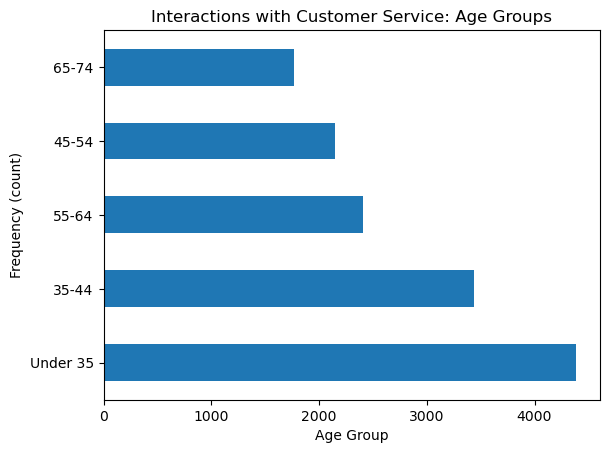

In [12]:
age_cl_value_counts = age_cl.value_counts()

# Bar plot of `age_cl_value_counts`
age_cl_value_counts.plot(kind = "barh",
                        xlabel = "Age Group",
                        ylabel = "Frequency (count)",
                        title = "Interactions with Customer Service: Age Groups");

Create a histogram of the "Age" column with 10 bins. Be sure to label the x-axis "Age", the y-axis "Frequency (count)", and use the title "Customer Interaction: Age Distribution".

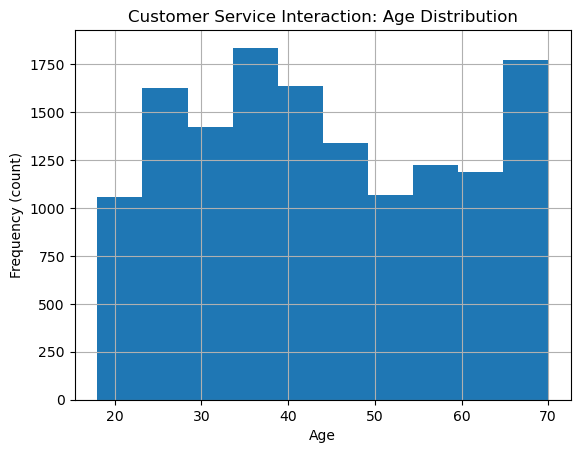

In [13]:
# Plot histogram of "AGE"
df1["Age"].hist(bins=10)
plt.xlabel("Age")
plt.ylabel("Frequency (count)")
plt.title("Customer Service Interaction: Age Distribution");

Create a pie chart showing the normalized value counts for "Occupation". Use the title "Customer Service Interaction by Chat: Occupation Groups". 

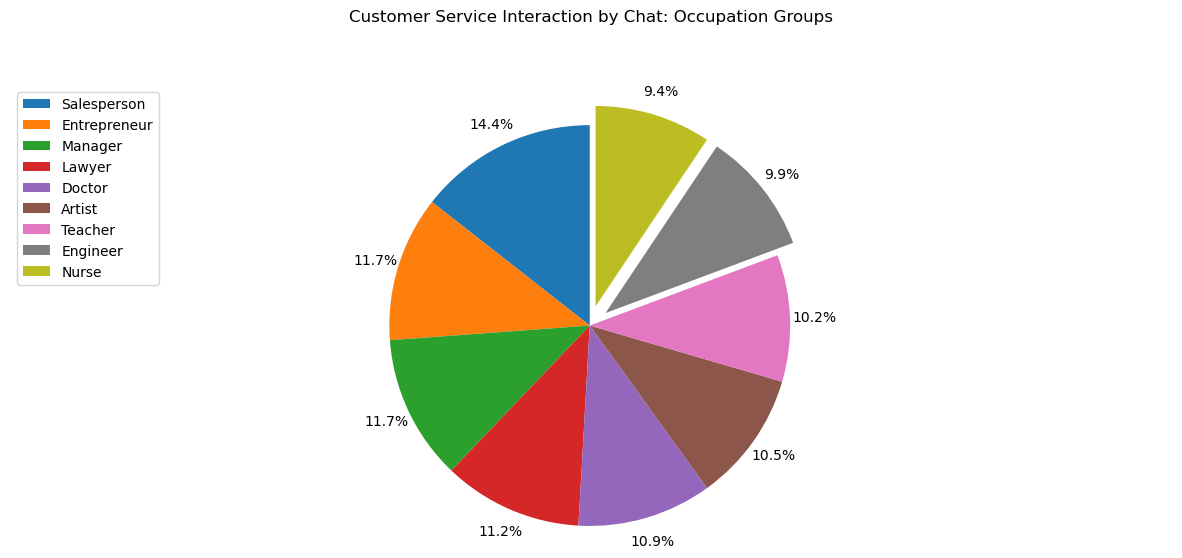

In [14]:
# Aggregate the counts of each Occupation group
occupation_counts = df1['Occupation'].value_counts()

# Dynamically create explode_list with 0.1 for the last two categories
explode_list = [0.1 if i >= len(occupation_counts) - 2 else 0 for i in range(len(occupation_counts))]

# Plot the pie chart
occupation_counts.plot(
    kind='pie',
    figsize=(15, 6),
    autopct='%1.1f%%',
    startangle=90,
    labels=None,                 # Turn off labels on pie chart
    pctdistance=1.12,            # The ratio between the pie center and start of text label
    explode=explode_list         # Dynamically adjusted 'explode' values
)

# Scale the title up by 12% to match pctdistance
plt.title("Customer Service Interaction by Chat: Occupation Groups", y=1.12)
plt.ylabel('')  # Remove the default 'count' label on the y-axis
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle

# Add legend
plt.legend(labels=occupation_counts.index, loc='upper left')

# Show plot
plt.show()

### Income

Create a DataFrame df_income that shows the normalized frequency for income categories for all Occupation groups in the dataset. 

In [15]:
mean_income_by_occupation = df.groupby('Occupation')['Income Level'].mean().sort_values(ascending = False)
mean_income_by_occupation.head()

Occupation
Artist         84224.489764
Nurse          83731.283123
Salesperson    83378.892537
Doctor         82862.251929
Lawyer         82671.421645
Name: Income Level, dtype: float64

Use mean_income_by_occupation to create a bar chart of the results. Make sure the occupations are sorted from the highest to lowest mean(top 3), Label the y-axis as "Occupation" and the x-axis as "Income", and give the chart the title "Mean Income of the highest 3 Occupations"

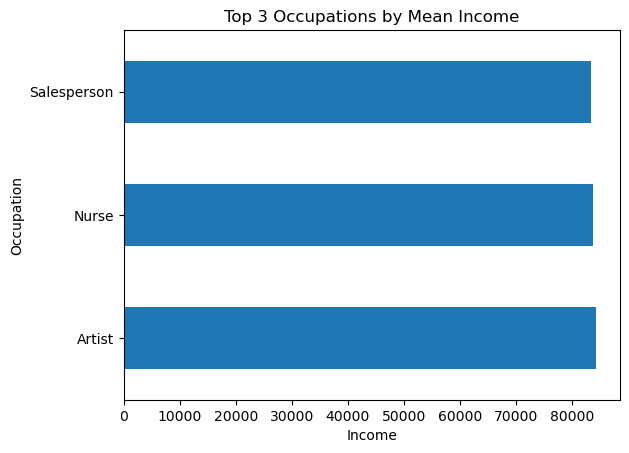

In [16]:
# Create bar chart from `mean_price_by_state` using pandas
mean_income_by_occupation.head(3).plot(
    kind = "barh",
    xlabel= "Income",
    ylabel= "Occupation",
    title = "Top 3 Occupations by Mean Income");

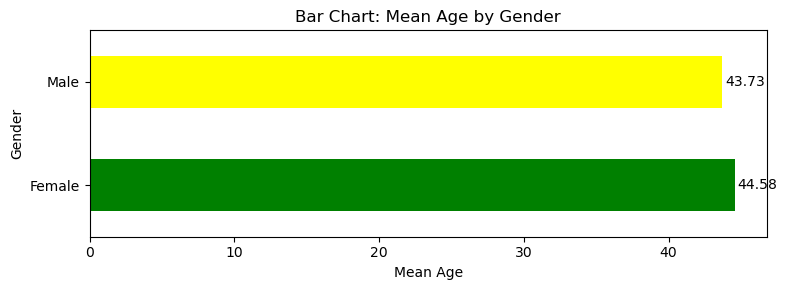

In [17]:
# Group by 'Gender' and calculate the mean of 'Age'
grouped_data = df.groupby('Gender')['Age'].mean()

# Plot the bar chart
ax = grouped_data.plot(kind='barh', color=['green', 'yellow'], figsize=(8, 3))

# Add value labels
for index, value in enumerate(grouped_data):
    plt.text(value + 0.2, index, f'{value:.2f}', va='center', fontsize=10, color='black')

# Customize the chart
plt.title('Bar Chart: Mean Age by Gender')
plt.xlabel('Mean Age')
plt.ylabel('Gender')

# Show the plot
plt.tight_layout()
plt.show()

Females are slightly older than Males

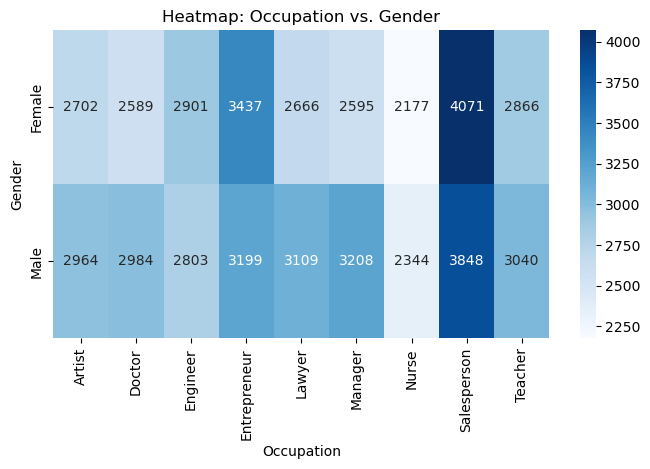

In [18]:
# Group and count occurrences of each combination
grouped_data = df.groupby(['Gender', 'Occupation']).size().reset_index(name='Counts') 

# Pivot for visualization (optional for heatmaps)
pivot_table = grouped_data.pivot(index='Gender', columns='Occupation', values='Counts').fillna(0)

# Plot as a heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(pivot_table, annot=True, cmap='Blues', fmt='.0f')
plt.title('Heatmap: Occupation vs. Gender')
plt.xlabel('Occupation')
plt.ylabel('Gender')
plt.show()

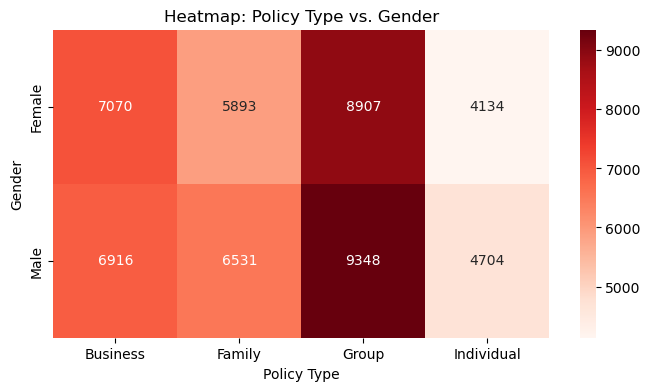

In [19]:
# Group and count occurrences of each combination
grouped_data = df.groupby(['Gender', 'Policy Type']).size().reset_index(name='Counts') 

# Pivot for visualization (optional for heatmaps)
pivot_table = grouped_data.pivot(index='Gender', columns='Policy Type', values='Counts').fillna(0)

# Plot as a heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(pivot_table, annot=True, cmap='Reds', fmt='.0f')
plt.title('Heatmap: Policy Type vs. Gender')
plt.xlabel('Policy Type')
plt.ylabel('Gender')
plt.show()

Determine the 5 most prevalent geographical locations in the dataset

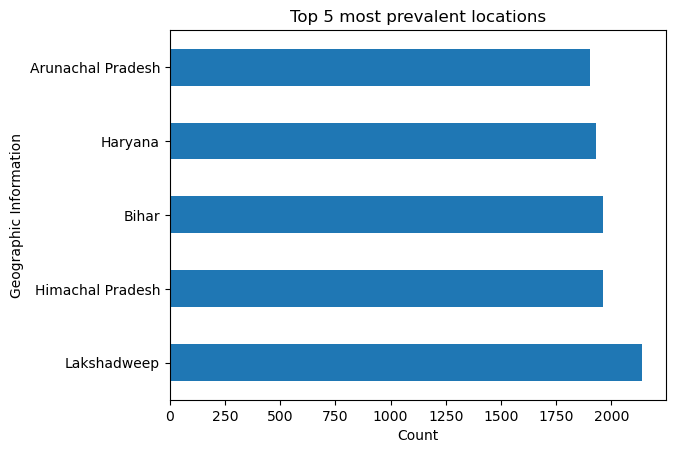

In [20]:
df["Geographic Information"].value_counts().head().plot(kind = "barh")
plt.xlabel("Count")
plt.title("Top 5 most prevalent locations");

Determine the 3 uncommon geographical locations in the dataset

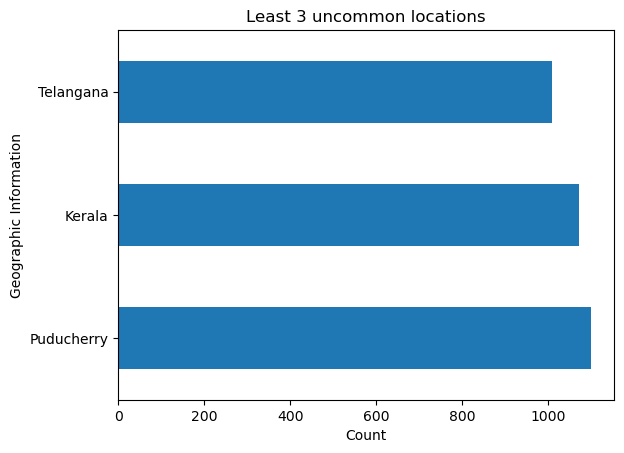

In [21]:
df["Geographic Information"].value_counts().tail(3).plot(kind = "barh")
plt.xlabel("Count")
plt.title("Least 3 uncommon locations");

<center>
<table>
  <tr>
    <th>Date (YYYY-MM-DD)</th>
    <th>Author</th>
  </tr>
  <tr>
    <td>2025-01-18</td>
    <td>Andrew Kalumba Harris</td>
  </tr>
</table>
</center>